In [5]:
list = [1, 3, 5, 2, 4, 9, 5, 8, 0, 7, 6]

def oracale(input):
    winner = 7
    if input == winner:
        return True
    else:
        return False
    
for index, trial_number in enumerate(list):
    if oracale(trial_number):
        print("Winner Found at index {0}".format(index))
        print("{0} calls to the oracale used".format(index + 1))
        break

Winner Found at index 9
10 calls to the oracale used


In [7]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

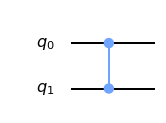

In [23]:
# define the oracale circuit

oracale = QuantumCircuit(2, name="oracale")
oracale.cz(0, 1)
oracale.to_gate()
oracale.draw("mpl")

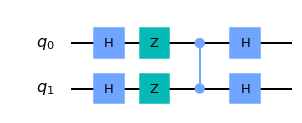

In [25]:
reflection = QuantumCircuit(2, name="reflection")
reflection.h([0, 1])
reflection.z([0, 1])
reflection.cz(0, 1)
reflection.h([0, 1])
reflection.to_gate()
reflection.draw("mpl")

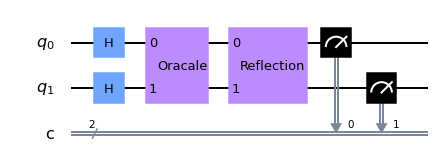

In [30]:
backend = Aer.get_backend("qasm_simulator")
grover_circ = QuantumCircuit(2, 2)
grover_circ.h([0, 1])
grover_circ.append(oracale, [0, 1])
grover_circ.append(reflection, [0, 1])
grover_circ.measure([0, 1], [0, 1])
grover_circ.draw("mpl")

In [31]:
job = execute(grover_circ, backend)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 1024}
